In [ ]:
import sys
import os
root_path = os.path.dirname(os.path.abspath(os.curdir))
sys.path.insert(0, root_path)
dataset_path = os.path.join(root_path, "output")
graph_path = os.path.join(dataset_path, "graph.csv")


In [29]:
import networkx as nx
import polars as pl
from pyvis.network import Network
import matplotlib.pyplot as plt
import random

In [10]:
nt = Network('500px', '500px')
df = pl.read_csv(graph_path)

In [11]:
df.head()

entity,company,relationship
str,str,str
"""XTREME ELECTRICAL SERVICES, IN…","""X ELECTRIC""","""OWNER_NAME"""
"""REGISTERED AGENTS INC""","""X BLOCK INC""","""COMMERCIAL_REGISTERED_AGENT"""
"""OECH FOODS LLC""","""X FOODS""","""OWNER_NAME"""
"""C T CORPORATION SYSTEM""","""XZILON, INC.""","""COMMERCIAL_REGISTERED_AGENT"""
"""C T CORPORATION SYSTEM""","""XYZ ROOFCO, LLC""","""COMMERCIAL_REGISTERED_AGENT"""


In [22]:
knowledge_graph = df.to_numpy().tolist()

In [26]:
knowledge_graph = [(graph[0], graph[1], {"label" : graph[2]}) for graph in knowledge_graph]

In [39]:
nt = Network('500px', '500px', notebook=True)

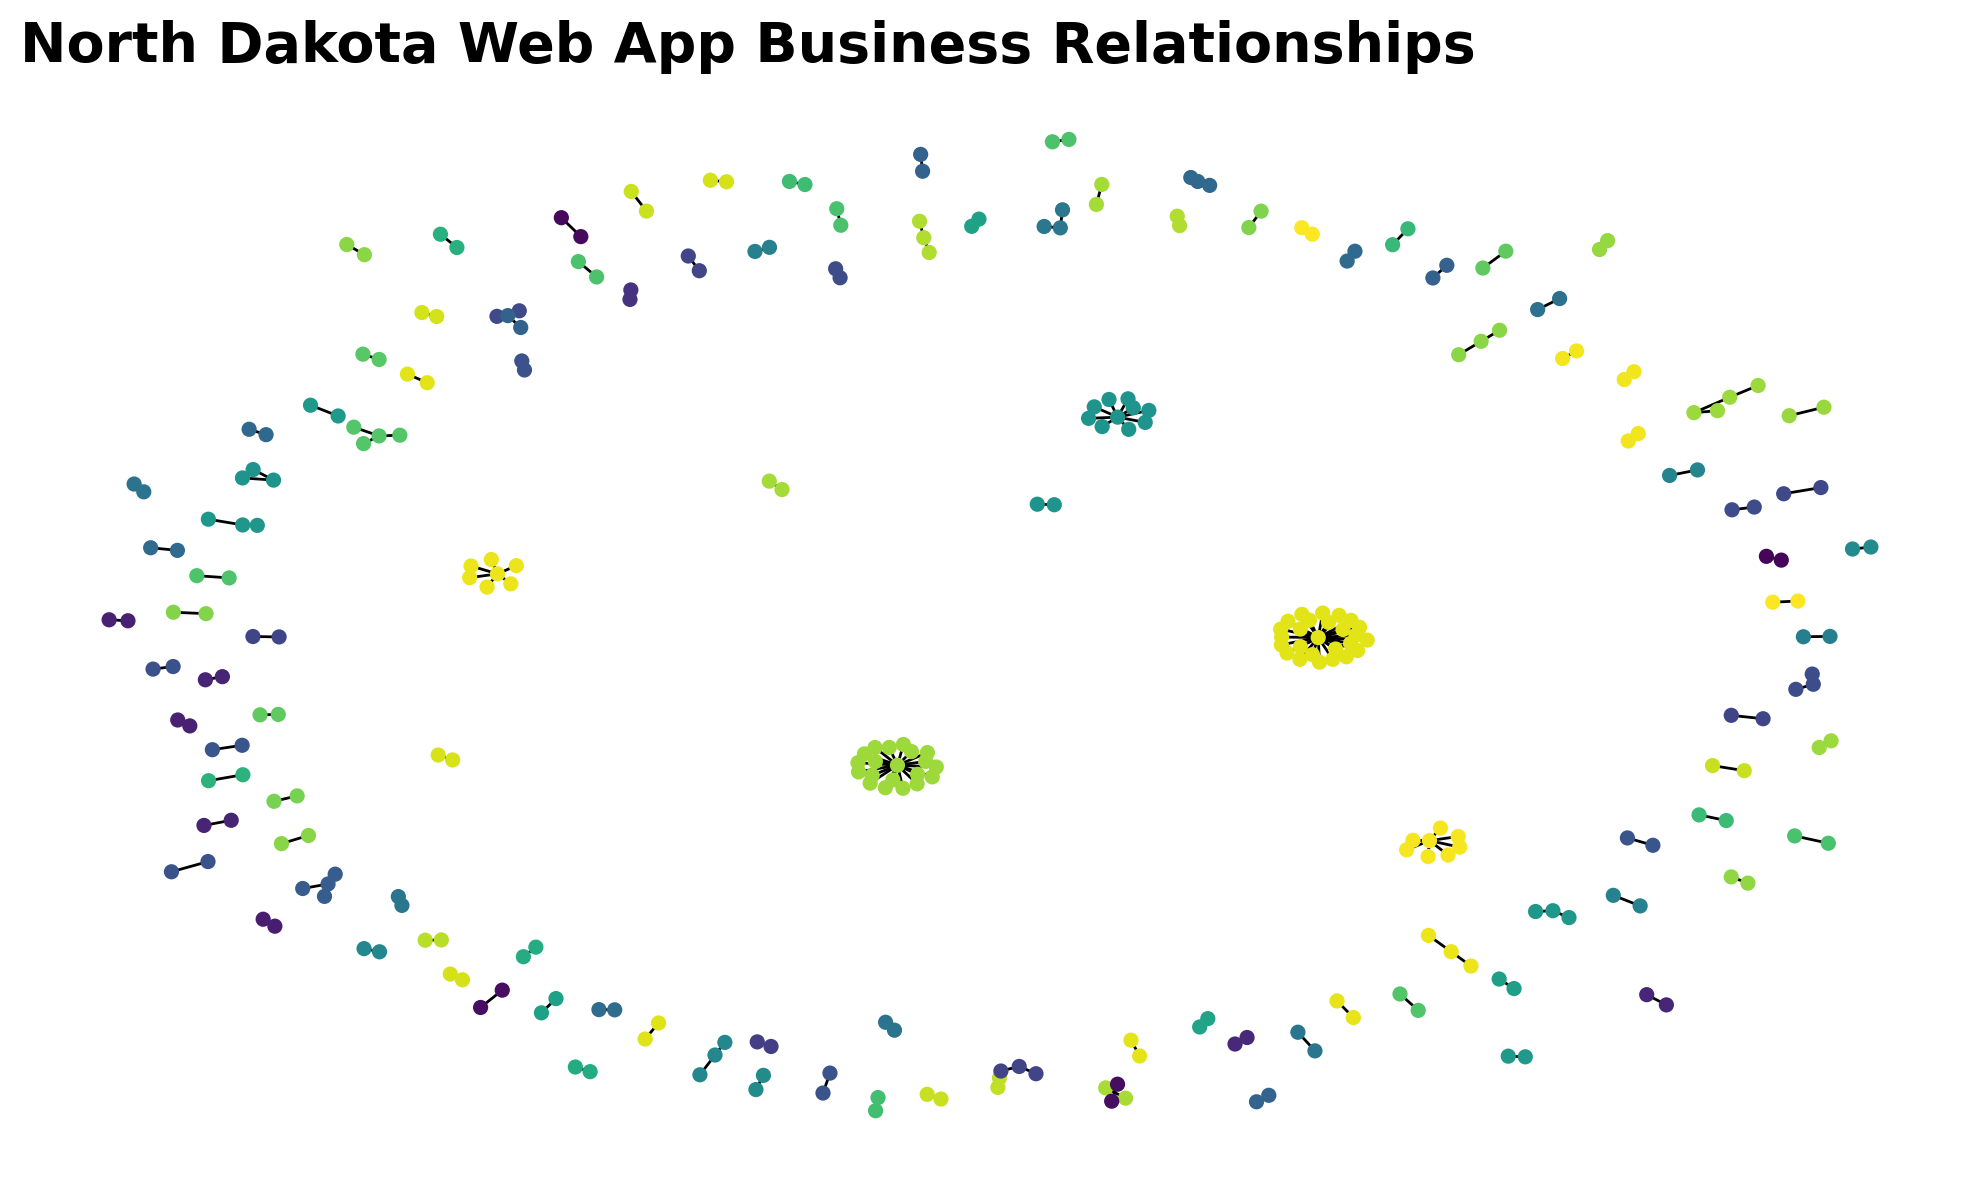

In [42]:
G = nx.Graph()
# G.add_nodes_from(self.nodes)
G.add_edges_from(knowledge_graph)  # Populate Graph

pos = nx.spring_layout(G)  # add some distance
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, ax=ax, node_size=20, node_color=c, vmin=0.0, vmax=1.0)
plt.axis("off")
plt.title(
    "North Dakota Web App Business Relationships",
    x=0,
    y=1,
    va="bottom",
    ha="left",
    fontsize=20,
    fontweight=800,
)
plt.tight_layout()

In [44]:
for node in G.nodes:
    print(node)
    break

XTREME ELECTRICAL SERVICES, INC.


In [40]:
nt.from_nx(G)

In [41]:
nt.show(name="hello.html")

hello.html
